# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
dfCancer = pd.read_csv("/home/amol/GL/LabML/Residency4/Cancer.csv")

In [3]:
dfCancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [ ]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
dfCancer.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
dfCancer.shape

(699, 11)

In [6]:
dfCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
dfCancer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [14]:
#Function to check if any column has null values
def CheckifNullExists(sr) :
    if (sr.isnull().sum() >0) :
        return ("Column" + " " + "'" + sr.name + "'" + " " + "has " + sr.isnull().sum() + " values")
    else :
        return ("Column" + " " + "'" + sr.name + "'" + " " + "has no null values")

In [15]:
# Check if any column has null values
for (columnName, columnData) in dfCancer.iteritems():
    print(CheckifNullExists (columnData))

Column 'ID' has no null values
Column 'ClumpThickness' has no null values
Column 'Cell Size' has no null values
Column 'Cell Shape' has no null values
Column 'Marginal Adhesion' has no null values
Column 'Single Epithelial Cell Size' has no null values
Column 'Bare Nuclei' has no null values
Column 'Normal Nucleoli' has no null values
Column 'Bland Chromatin' has no null values
Column 'Mitoses' has no null values
Column 'Class' has no null values


In [13]:
dfCancer['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [17]:
dfCancer.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [19]:
dfCancer['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [ ]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [20]:
#Lets repalce ? with 1 as number of 1 is 402
dfCancer['Bare Nuclei'].replace("?","1",inplace=True)
dfCancer['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [23]:
#Lets check for duplicate records
duplicate = dfCancer.duplicated()
print(duplicate.sum())

9


In [25]:
dfCancer[duplicate]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [34]:
dfCancer.drop_duplicates(subset=None, keep="first", inplace=True)

In [35]:
dfCancer.shape

(690, 11)

In [36]:
dul = dfCancer.duplicated()
print(dul.sum())

0


In [38]:
#Change data type of 'Bare Nuclei' to int64
dfCancer['Bare Nuclei'] = dfCancer['Bare Nuclei'].astype('int64')

In [39]:
dfCancer.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [ ]:
# Check for correlation of variable

In [40]:
dfCancer.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

Inferences based on corelation 
1) Cell size and Cell Shape - shows very high co-relation. 
2) Cell size and Normal Nucleoli - show high co-relation
3) Cell size shows high co-relation with almost all other fields except 'Mitoses' field

In [42]:
#Lets take back up of data set
dfCancer_backup = dfCancer

In [47]:
#drop Id column 
dfCancer= dfCancer.drop(['ID'],axis=1)

In [ ]:
#Let us check for pair plots

/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/amol/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


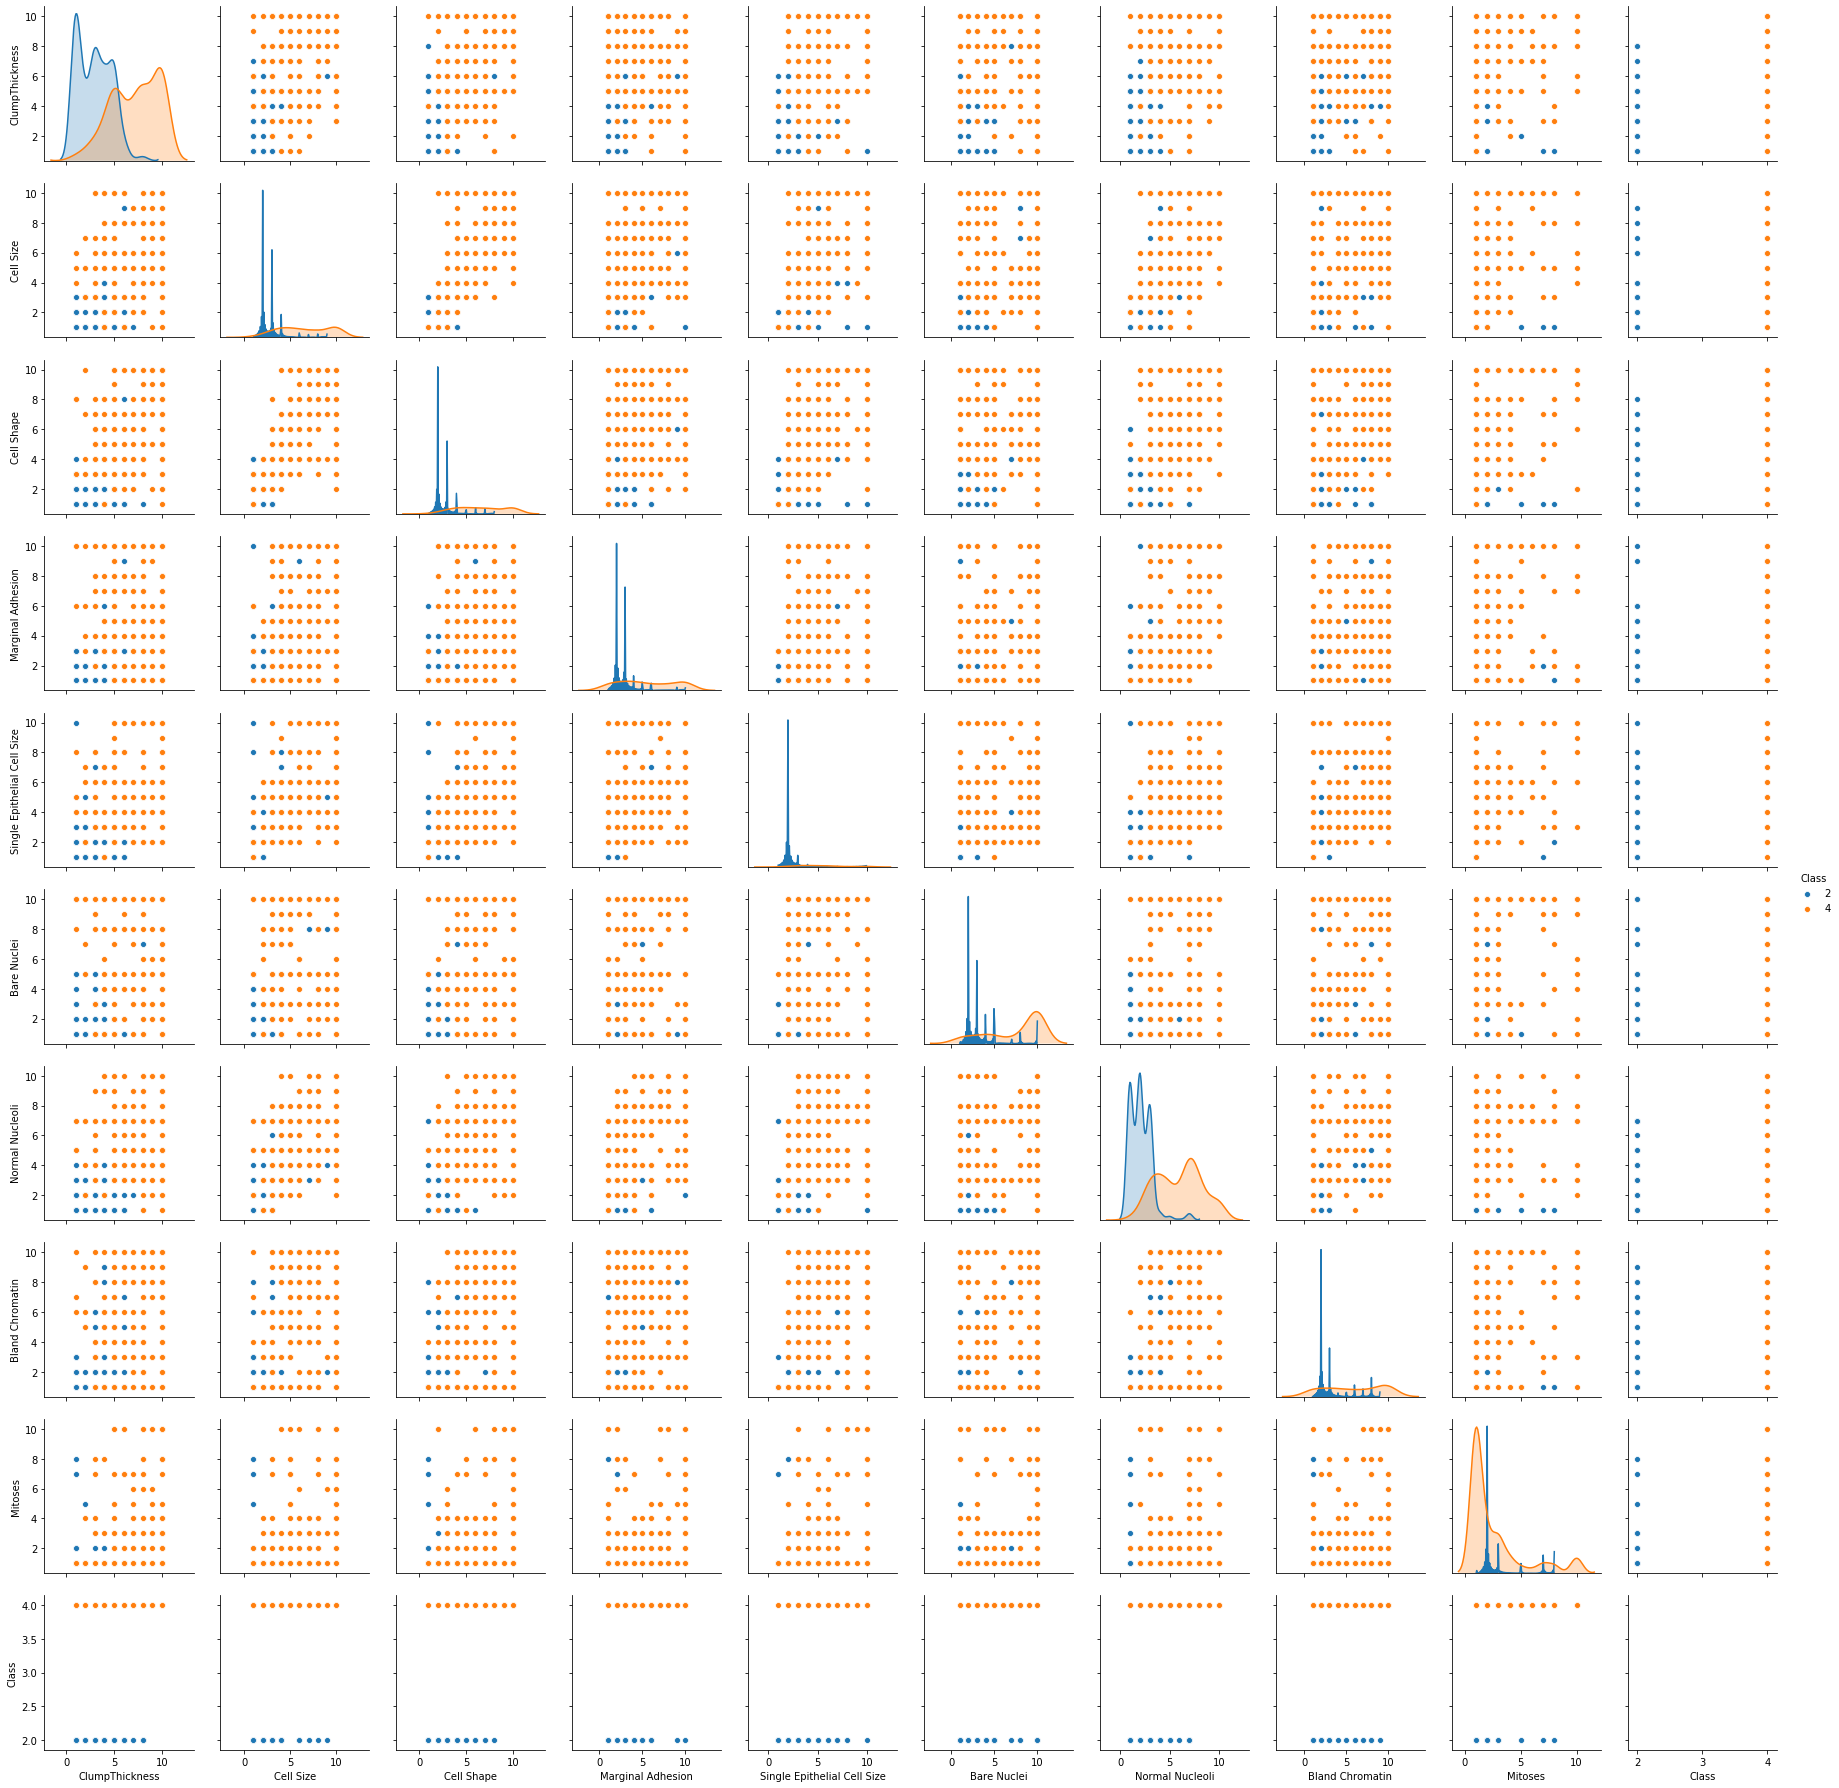

In [49]:
sns.pairplot(dfCancer, diag_kind='kde', hue='Class')

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

Inferences based on corelation 
1) ClumThickness - this field shows good amount classification
2) The distribution of Cell size, cell shape, Marginal Adhesion, Single Epithelial Cell Size for class 4 - do not see any peaks...most the distribution is bulgy and have low values

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

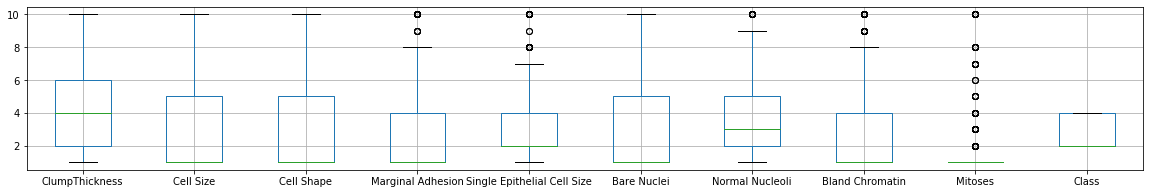

In [50]:
dfCancer.boxplot(figsize=(20,3))

Inferences based on corelation 
1) We can see outliers in fields - Marginal Adhesion Signle, Single Epithelial Cell size, Normal Nucleoli, Brand Chromatin, mitoses

In [51]:
cross = pd.crosstab(dfCancer['Marginal Adhesion'],dfCancer['Class'])
cross

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [52]:
dfCancer['Marginal Adhesion'] = np.where(dfCancer['Marginal Adhesion'] > 6,6,dfCancer['Marginal Adhesion'])

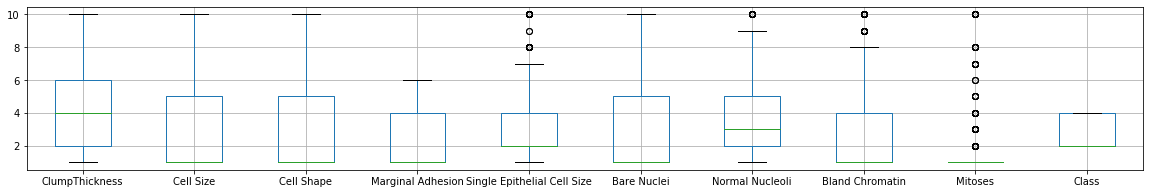

In [54]:
dfCancer.boxplot(figsize=(20,3))

In [53]:
cross = pd.crosstab(dfCancer['Single Epithelial Cell Size'],dfCancer['Class'])
cross

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [55]:
dfCancer['Single Epithelial Cell Size'] = np.where(dfCancer['Single Epithelial Cell Size'] > 6,6,dfCancer['Single Epithelial Cell Size'])

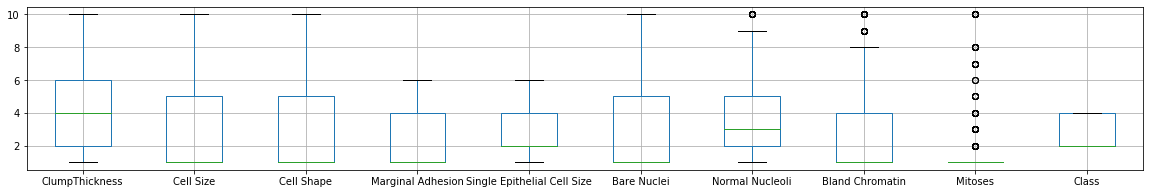

In [56]:
dfCancer.boxplot(figsize=(20,3))

In [57]:
cross = pd.crosstab(dfCancer['Normal Nucleoli'],dfCancer['Class'])
cross

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [58]:
dfCancer['Normal Nucleoli'] = np.where(dfCancer['Normal Nucleoli'] > 6,6,dfCancer['Normal Nucleoli'])

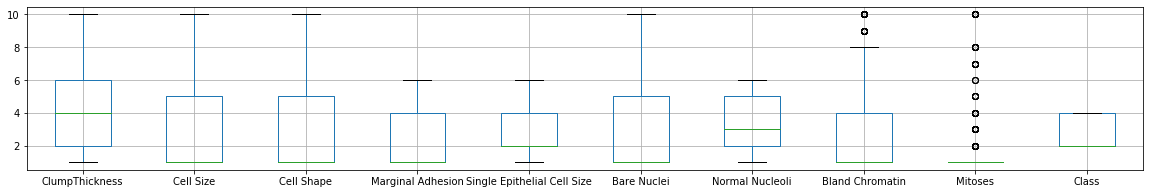

In [59]:
dfCancer.boxplot(figsize=(20,3))

In [60]:
cross = pd.crosstab(dfCancer['Bland Chromatin'],dfCancer['Class'])
cross

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [61]:
dfCancer['Bland Chromatin'] = np.where(dfCancer['Bland Chromatin'] > 5,5,dfCancer['Bland Chromatin'])

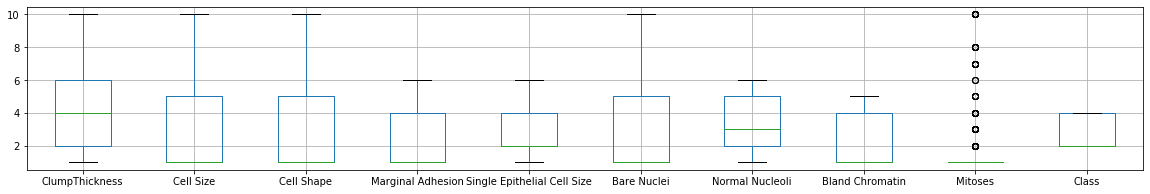

In [62]:
dfCancer.boxplot(figsize=(20,3))

In [63]:
cross = pd.crosstab(dfCancer['Mitoses'],dfCancer['Class'])
cross

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [64]:
dfCancer['Mitoses'] = np.where(dfCancer['Mitoses'] > 3,3,dfCancer['Mitoses'])

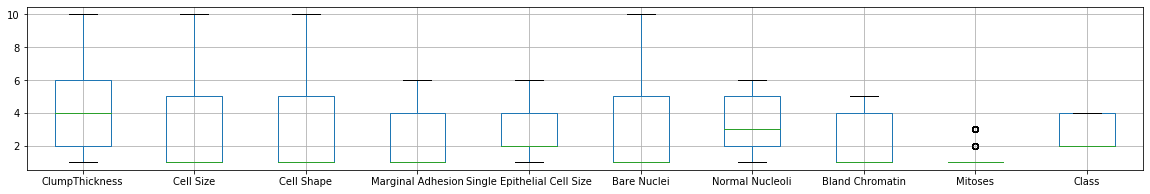

In [65]:
dfCancer.boxplot(figsize=(20,3))

In [66]:
#Lets drop class column
dfCancer_new = dfCancer.drop('Class',axis=1)

In [69]:
dfCancer_new.shape

(690, 9)

In [71]:
from scipy.stats import zscore

In [72]:
dfCancer_new_std = dfCancer_new.apply(zscore)

In [74]:
dfCancer_new_std.head(10)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.202823,-0.701698,-0.745040,-0.717738,-0.606754,-0.686858,-0.049515,-0.694409,-0.438024
1,0.202823,0.285065,0.268920,1.339330,1.934431,1.803153,-0.049515,-0.099940,-0.438024
2,-0.507572,-0.701698,-0.745040,-0.717738,-0.606754,-0.410190,-0.049515,-0.694409,-0.438024
3,0.558020,1.600748,1.620866,-0.717738,0.028542,0.143146,-0.049515,1.683467,-0.438024
4,-0.152375,-0.701698,-0.745040,0.310796,-0.606754,-0.686858,-0.049515,-0.694409,-0.438024
5,1.268415,2.258590,2.296839,1.853597,1.934431,1.803153,1.630733,1.683467,-0.438024
6,-1.217967,-0.701698,-0.745040,-0.717738,-0.606754,1.803153,-0.049515,-0.694409,-0.438024
7,-0.862769,-0.701698,-0.407053,-0.717738,-0.606754,-0.686858,-0.049515,-0.694409,-0.438024
8,-0.862769,-0.701698,-0.745040,-0.717738,-0.606754,-0.686858,-1.169679,-0.694409,2.539677
9,-0.152375,-0.372777,-0.745040,-0.717738,-0.606754,-0.686858,-0.609597,-0.694409,-0.438024


# Q6 Create a covariance matrix for identifying Principal components

In [77]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(dfCancer_new_std.T)
print(cov_matrix)

[[1.00145138 0.64410677 0.65453792 0.52967571 0.56014292 0.59150555
  0.5814679  0.56519282 0.42745595]
 [0.64410677 1.00145138 0.9066632  0.73739949 0.78736392 0.68556472
  0.74086614 0.7326205  0.51098944]
 [0.65453792 0.9066632  1.00145138 0.71499206 0.75864187 0.70518656
  0.7243786  0.72533182 0.48167882]
 [0.52967571 0.73739949 0.71499206 1.00145138 0.68674237 0.70175121
  0.68260848 0.66206061 0.45304643]
 [0.56014292 0.78736392 0.75864187 0.68674237 1.00145138 0.64591131
  0.6691557  0.70666004 0.49711992]
 [0.59150555 0.68556472 0.70518656 0.70175121 0.64591131 1.00145138
  0.69799413 0.63664094 0.45258904]
 [0.5814679  0.74086614 0.7243786  0.68260848 0.6691557  0.69799413
  1.00145138 0.69332464 0.41276853]
 [0.56519282 0.7326205  0.72533182 0.66206061 0.70666004 0.63664094
  0.69332464 1.00145138 0.49183027]
 [0.42745595 0.51098944 0.48167882 0.45304643 0.49711992 0.45258904
  0.41276853 0.49183027 1.00145138]]


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [78]:
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

In [79]:
print("Eigen Values", eigen_values)
print("Eigen Vectors", eigen_vectors)

Eigen Values [6.14128049 0.67800787 0.51493374 0.08998206 0.42207055 0.25365022
 0.29242428 0.27713163 0.34358157]
Eigen Vectors [[ 3.00539165e-01  1.14413268e-02  9.04357067e-01 -1.07841982e-02
  -2.56784626e-02  1.75583855e-01 -2.21167452e-01 -1.05087249e-01
   1.09478795e-02]
 [ 3.70460098e-01 -7.64901358e-02 -4.00416683e-02 -7.36247645e-01
  -3.20979286e-01 -2.73909733e-01  2.51634087e-01 -1.00822201e-01
   2.48406059e-01]
 [ 3.66626518e-01 -1.15889208e-01  2.49308904e-02  6.61923313e-01
  -2.87667397e-01 -4.47378420e-01  2.57830698e-01 -1.09832785e-02
   2.52771404e-01]
 [ 3.37752428e-01 -1.27164506e-01 -3.03132242e-01  5.45612198e-02
   3.34272927e-01  1.13551782e-01 -4.53626838e-01 -5.62091102e-01
   3.58511214e-01]
 [ 3.45741676e-01 -9.17913548e-03 -2.25372316e-01  7.08941091e-02
  -3.65885417e-01  6.52456370e-01 -1.05705986e-01  4.63582695e-01
   1.97245173e-01]
 [ 3.34012345e-01 -1.21164870e-01  2.40478034e-02 -8.58548099e-02
   6.76329562e-01 -2.22583519e-01  1.55872699e-02 

# Q8 Find variance and cumulative variance by each eigen vector

In [81]:
total = sum(eigen_values)
var_exp = [(i/total)*100 for i in sorted(eigen_values,reverse=True)]

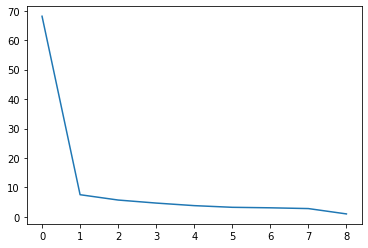

In [82]:
plt.plot(var_exp)

In [83]:
cum_var_exp = np.cumsum(var_exp)
print ("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 68.1375565   75.66005925  81.37325321  86.05612941  89.86816973
  93.11261948  96.18739712  99.00164832 100.        ]


No handles with labels found to put in legend.


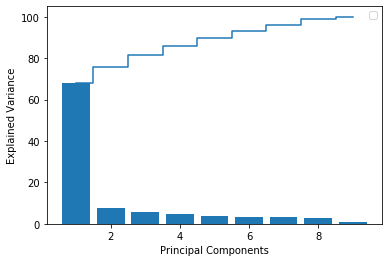

In [92]:
plt.bar(range(1,eigen_values.size+1),var_exp,align='center')
plt.step(range(1,eigen_values.size+1),cum_var_exp, where='mid')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [93]:
from sklearn.decomposition import PCA

In [94]:
#Lets consider 7 components as more than 95 % variance is captured by 7 features
pca = PCA(n_components=7)

In [95]:
reduced_dataset = pca.fit_transform(dfCancer_new_std)

In [96]:
reduced_dataset

array([[-1.5153726 , -0.0770846 , -0.68073196, ..., -0.27898654,
         0.22172818, -0.22506865],
       [ 1.82891842, -0.8594924 ,  0.57107889, ...,  1.22368164,
        -0.72660054,  1.20456058],
       [-1.63646358, -0.11873489, -0.04493465, ..., -0.26791077,
         0.38315688,  0.01418565],
       ...,
       [ 3.85660313,  0.12667998,  0.83303721, ..., -0.32609976,
         1.0251318 , -0.07889929],
       [ 2.24749173, -1.16021177,  0.78294727, ..., -0.98835097,
         0.35928771, -0.85724511],
       [ 2.77915245, -1.34049064,  0.95732946, ..., -0.08180587,
         0.53256141, -0.7316766 ]])

In [97]:
pca.components_

array([[ 0.30053917,  0.3704601 ,  0.36662652,  0.33775243,  0.34574168,
         0.33401235,  0.34008159,  0.33966908,  0.24861958],
       [ 0.01144133, -0.07649014, -0.11588921, -0.12716451, -0.00917914,
        -0.12116487, -0.23405938, -0.00472606,  0.94596296],
       [-0.90435707,  0.04004167, -0.02493089,  0.30313224,  0.22537232,
        -0.0240478 ,  0.05759653,  0.17020409,  0.06607939],
       [ 0.02567846,  0.32097929,  0.2876674 , -0.33427293,  0.36588542,
        -0.67632956, -0.20586649,  0.23341295, -0.1168998 ],
       [ 0.01094788,  0.24840606,  0.2527714 ,  0.35851121,  0.19724517,
         0.0681434 , -0.48265546, -0.68488986, -0.01308826],
       [-0.22116745,  0.25163409,  0.2578307 , -0.45362684, -0.10570599,
         0.01558727,  0.5823203 , -0.49643386,  0.13620219],
       [-0.10508725, -0.1008222 , -0.01098328, -0.5620911 ,  0.4635827 ,
         0.59494025, -0.29052085,  0.06233377, -0.07465814]])

# Q10 Find correlation between components and features

In [99]:
list(dfCancer_new_std)

['ClumpThickness',
 'Cell Size',
 'Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Normal Nucleoli',
 'Bland Chromatin',
 'Mitoses']

In [100]:
df_comp_feature  = pd.DataFrame(pca.components_,columns=list(dfCancer_new_std))

In [101]:
df_comp_feature

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.300539,0.370460,0.366627,0.337752,0.345742,0.334012,0.340082,0.339669,0.248620
1,0.011441,-0.076490,-0.115889,-0.127165,-0.009179,-0.121165,-0.234059,-0.004726,0.945963
2,-0.904357,0.040042,-0.024931,0.303132,0.225372,-0.024048,0.057597,0.170204,0.066079
3,0.025678,0.320979,0.287667,-0.334273,0.365885,-0.676330,-0.205866,0.233413,-0.116900
4,0.010948,0.248406,0.252771,0.358511,0.197245,0.068143,-0.482655,-0.684890,-0.013088
5,-0.221167,0.251634,0.257831,-0.453627,-0.105706,0.015587,0.582320,-0.496434,0.136202
6,-0.105087,-0.100822,-0.010983,-0.562091,0.463583,0.594940,-0.290521,0.062334,-0.074658


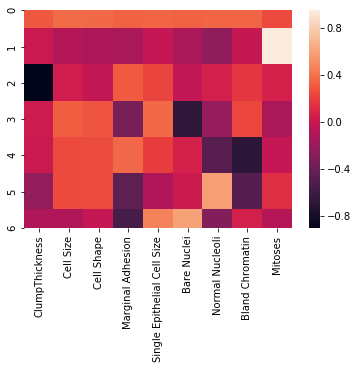

In [102]:
sns.heatmap(df_comp_feature)